Зенкович Виктория

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
import scipy.special as sps
import warnings
import scipy.stats
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [2]:
df=pd.read_excel('price.xlsx')

In [4]:
df.columns=map(str.lower, df.columns)

In [6]:
df.head()

,unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  b           506 non-null    float64
 13  lstat       506 non-null    float64
 14  price       506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


# Построение корреляционной матрицы

In [7]:
research_list = ["crim", "zn", "indus", "nox", "rm", "age", "dis", "rad", "lstat", "price"]

In [8]:
corr_m=df[research_list].corr()
corr_m

,crim,zn,indus,nox,rm,age,dis,rad,lstat,price
crim,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.603800,-0.483725
nox,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.488676,-0.381626
lstat,0.455621,-0.412995,0.603800,0.590879,-0.613808,0.602339,-0.496996,0.488676,1.000000,-0.737663
price,-0.388305,0.360445,-0.483725,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.737663,1.000000


Наибольшую связь с ценой имеют факторы lstat (-0.7376) и rm (0.6953).

<AxesSubplot:>

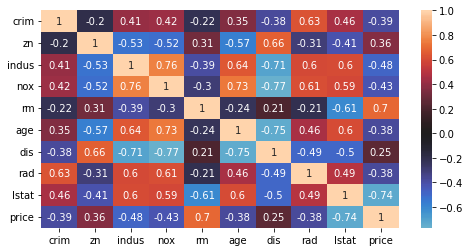

In [11]:
plt.figure(figsize=(8,4))
sns.heatmap(corr_m, center=0, annot=True)

Коэффициент корреляции 0.695359947071539


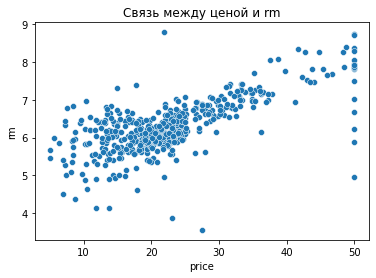

Коэффициент корреляции -0.7376627261740148


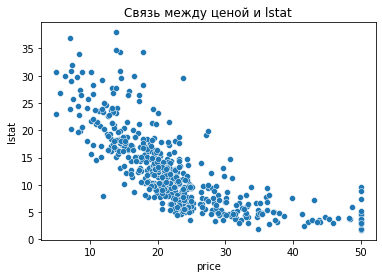

In [13]:
for i in research_list[:-1]:
    curr_corr = df[i].corr(df.price)
    if abs(curr_corr) >= 0.5:
        sns.scatterplot(x="price", y=i, data=df)
        print("Коэффициент корреляции " + str(curr_corr))
        plt.title("Связь между ценой и "+str(i))
        plt.show()

# Линейная модель регрессии

In [32]:
#Построение линейной модели регрессии с включением фактора lstat

In [16]:
X=df['lstat']
y=df['price']

In [23]:
result=scipy.stats.linregress(X, y)
result

LinregressResult(slope=-0.9500493537579909, intercept=34.55384087938311, rvalue=-0.7376627261740147, pvalue=5.081103394388519e-88, stderr=0.03873341621263944, intercept_stderr=0.5626273549884334)

При 1 шаге показателя lstat переменная price уменьшается на 0.95 (slope=-0.95). Связь между показателями статистически значимая - p-value<0.05.

In [26]:
#Вычисление коэффициента детерминации
r_sq=result.rvalue**2
r_sq

0.5441462975864795

Построенная линейная модель на 54% объясняет дисперсию (изменчивость) в переменной price. Коэффициент детерминации невысокий, но приемлимый.

Уравнение регрессии - result.intercept + result.slope * X

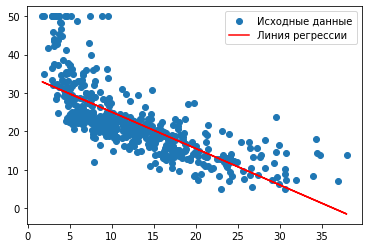

In [31]:
plt.scatter(X, y, label='Исходные данные')
plt.plot(X, result.intercept + result.slope * X, 'r', label='Линия регрессии')
plt.legend()

In [34]:
#Построение линейной модели регрессии с включением фактора rm

In [35]:
X=df['rm']
y=df['price']

In [39]:
model=scipy.stats.linregress(X, y)
model

LinregressResult(slope=9.102108981180306, intercept=-34.67062077643854, rvalue=0.695359947071539, pvalue=2.487228871008377e-74, stderr=0.41902656012134054, intercept_stderr=2.6498029930097355)

При 1 шаге показателя rm переменная price увеличивается на 9.10 (slope=9.10). Связь между показателями статистически значимая - p-value<0.05.

In [40]:
#Вычисление коэффициента детерминации
r_sq=model.rvalue**2
r_sq

0.48352545599133356

Построенная линейная модель на 48% объясняет дисперсию (изменчивость) в переменной price. Коэффициент детерминации низкий (меньше приемлимого значения 50%).

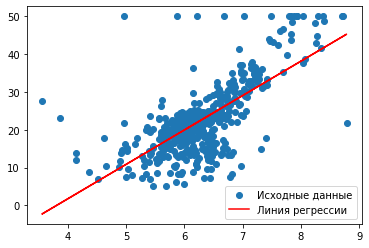

In [42]:
plt.scatter(X, y, label='Исходные данные')
plt.plot(X, model.intercept + model.slope * X, 'r', label='Линия регрессии')
plt.legend()

На долю вариации факторного признака rm приходится меньшая часть по сравнению с фактором lstat, влияющим на изменение результативного признака price.

# Модель множественной регрессии

In [52]:
#Исключаем зависимую переменную
X_mult=df.drop(['price', 'unnamed: 0'], axis=1)
X_mult.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [53]:
#Добавляем константу
X_mult['const']=1
X_mult.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,const
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,1


In [54]:
model=sm.OLS(y, X_mult)
result_mult=model.fit()
print(result_mult.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 17 Nov 2022   Prob (F-statistic):          6.72e-135
Time:                        08:37:11   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.1080      0.033     -3.287      0.0

Коэффициент детерминации равен 0.741. Выбранная модель объясняет примерно 74 % дисперсии. Введение новых факторов улучшило модель. Статистически значимыми (p-value<0.05) являются коэффициенты регрессии всех факторов, кроме indus и age.

При 1 шаге показателей, которые имеют отрицательные коэффициенты, переменная price уменьшается на данные значения. И наоборот увеличивается при 1 шаге показателей, имеющим положительные значения коэффициентов.

In [59]:
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):

    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')

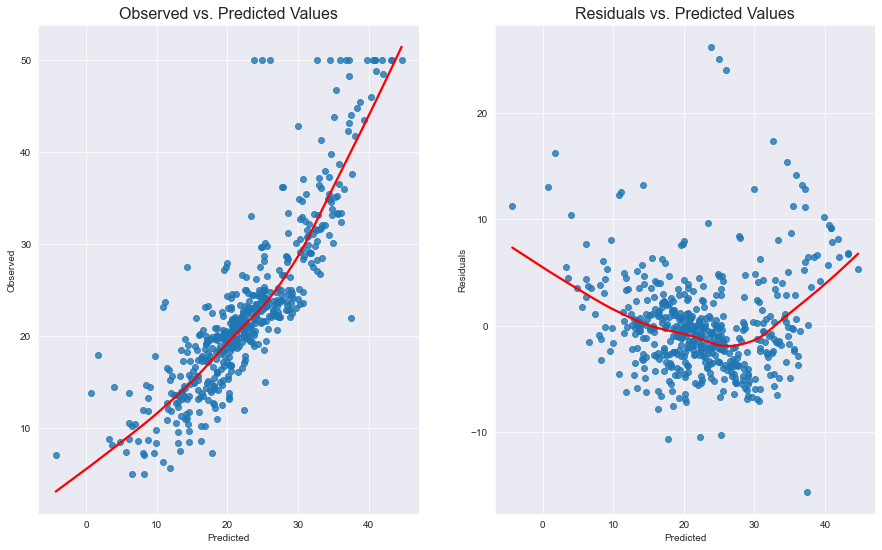

In [60]:
linearity_test(result_mult, y)    

По графикам видно, что есть выбросы в значениях показателей, поэтому можно проверить независимые переменные и удалить данные выбросы.

# Распределение показателей в датасете

In [62]:
bikeshare=pd.read_csv('bikeshare.csv')

In [98]:
bikeshare.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [64]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [66]:
bikeshare[['temp','windspeed']].describe()

,temp,windspeed
count,10886.00000,10886.000000
mean,20.23086,12.799395
std,7.79159,8.164537
min,0.82000,0.000000
25%,13.94000,7.001500
50%,20.50000,12.998000
75%,26.24000,16.997900
max,41.00000,56.996900


In [67]:
#Среднее значение
bikeshare[['temp','windspeed']].mean()

temp         20.230860
windspeed    12.799395
dtype: float64

Среднее значение показателя температура - 20.2, скорости ветра 12.8.

In [69]:
#Дисперсия
bikeshare[['temp','windspeed']].var()

temp         60.708872
windspeed    66.659670
dtype: float64

In [217]:
#Стандартное отклонение
bikeshare[['temp','windspeed']].std()

temp         7.791590
windspeed    8.164537
dtype: float64

Среднее отклонение от среднего арифметического распределения для температуры - 7.8, для скорости ветра - 8.16.

In [72]:
#50 процентиль
print(np.percentile(bikeshare.temp, 50))
print(np.percentile(bikeshare.windspeed, 50))

20.5
12.998


Температура - 50% значений находятся в диапазоне меньше 20.5, 50% - в диапазоне больше 20.5. 

Скорость ветра - 50% значений находятся в диапазоне меньше 12.9, 50% - в диапазоне больше 12.9. 

In [74]:
#75 процентиль
print(np.percentile(bikeshare.temp, 75))
print(np.percentile(bikeshare.windspeed, 75))

26.24
16.9979


Температура - 75% значений находятся в диапазоне меньше 26.2, 25% - в диапазоне больше 26.2. 

Скорость ветра - 75% значений находятся в диапазоне меньше 16.9, 25% - в диапазоне больше 16.9. 

In [75]:
#90 процентиль
print(np.percentile(bikeshare.temp, 90))
print(np.percentile(bikeshare.windspeed, 90))

30.34
23.9994


Температура - 90% значений находятся в диапазоне меньше 30.3, 10% - в диапазоне больше 30.3. 

Скорость ветра - 90% значений находятся в диапазоне меньше 23.9, 10% - в диапазоне больше 23.9. 

In [76]:
#99 процентиль
print(np.percentile(bikeshare.temp, 99))
print(np.percentile(bikeshare.windspeed, 99))

36.08
35.0008


Температура - 99% значений находятся в диапазоне меньше 36.1, 1% - в диапазоне больше 36.1. 

Скорость ветра - 99% значений находятся в диапазоне меньше 35, 1% - в диапазоне больше 35. 

In [77]:
#Мода
bikeshare[['temp','windspeed']].mode()

,temp,windspeed
0,14.76,0.0


Чаще встречающаяся температура в датасете 14.76, скорость ветра - 0.0.

<AxesSubplot:>

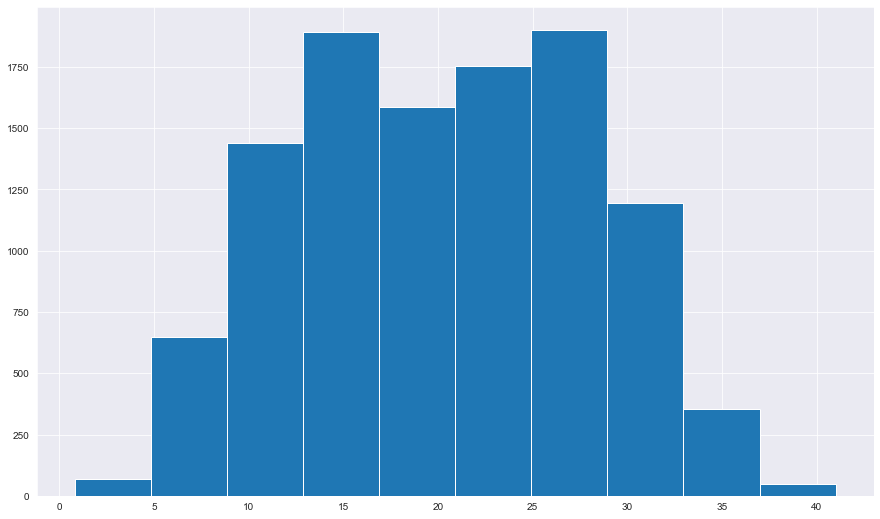

In [82]:
bikeshare.temp.hist()

Гистограмма имеет колокообразный симметричный вид - распределение данных по тепературе нормальное.

<AxesSubplot:>

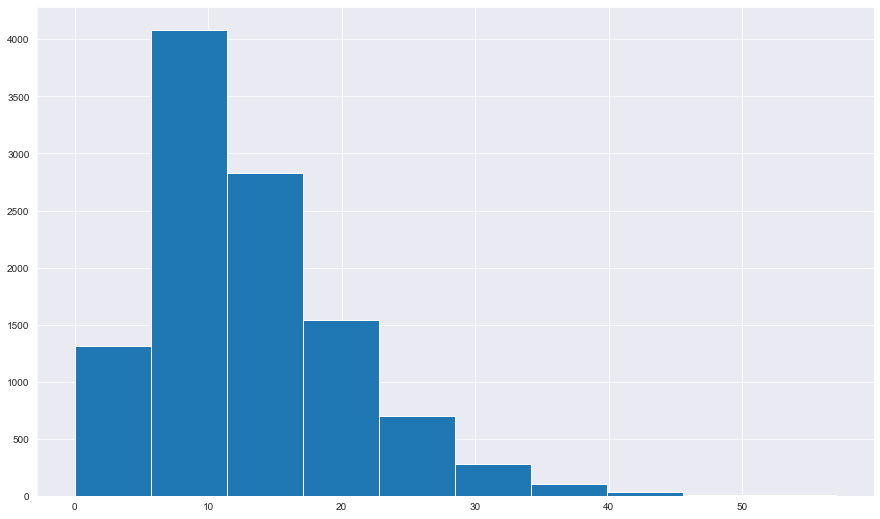

In [83]:
bikeshare.windspeed.hist()

Гистограмма склонена влево - можно произвести логарифмирование данных.

# Логарифмирование данных метрики windspeed

In [114]:
#Так как нельзя брать логарифм от 0, выбираем windspeed>0
windspeed_df = bikeshare.query('windspeed>0')

<AxesSubplot:>

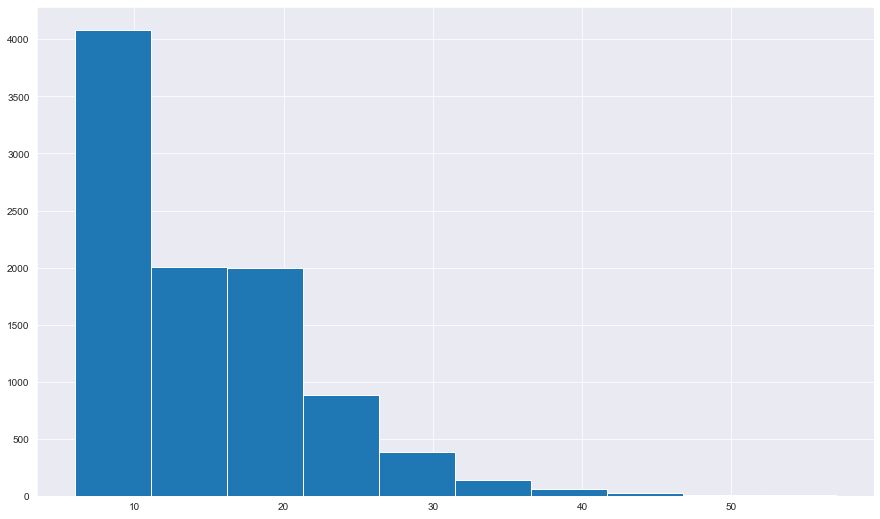

In [111]:
windspeed_df.windspeed.hist()

In [112]:
windspeed_df['windspeed_log']=np.log(windspeed_df.windspeed)

/var/folders/4f/zkg9tmbs22l_kzpykf2vs61h0000gn/T/ipykernel_1319/2019521172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  windspeed_df['windspeed_log']=np.log(windspeed_df.windspeed)


<AxesSubplot:>

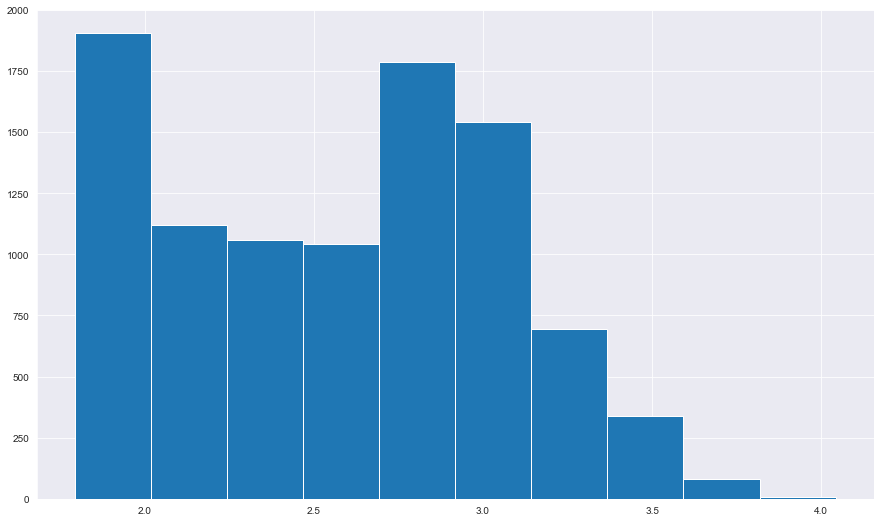

In [113]:
windspeed_df.windspeed_log.hist()

Распределение стало более симметричным.

# Построение симметричного доверительного интервала для метрики temp при доверительной вероятности 0.95

<AxesSubplot:>

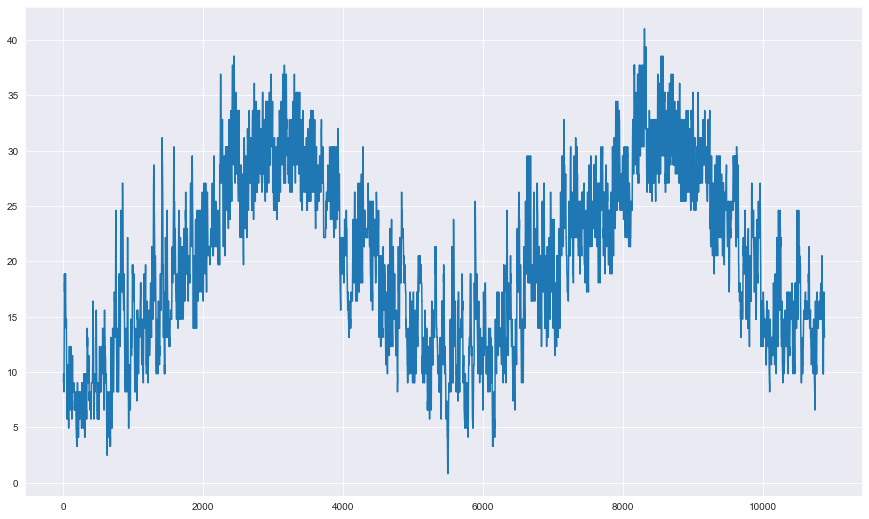

In [115]:
bikeshare.temp.plot()

In [116]:
def my_norm_confidence(df=bikeshare, column = "temp", alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval

In [117]:
#Доверительный интервал
confidence = my_norm_confidence()
print(confidence)

(4.959624343428603, 35.502095296475744)


Text(0.5, 1.0, 'Доверительный интервал')

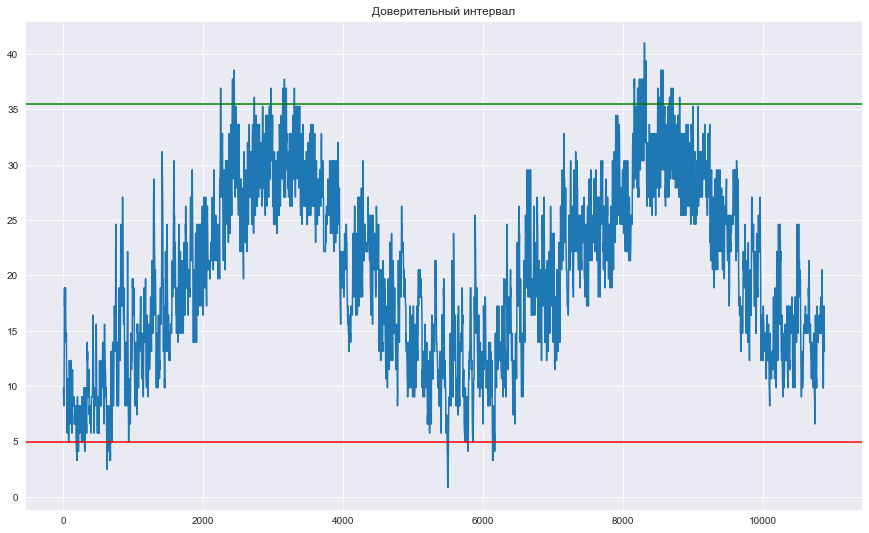

In [118]:
bikeshare.temp.plot()
plt.axhline(y=confidence[1], color="g", linestyle="-")
plt.axhline(y=confidence[0], color="r", linestyle="-")
plt.title("Доверительный интервал")

In [202]:
#Поиск аномальных значений для верхней границы доверительного интервала
bikeshare['anomaly_higher'] = np.where(bikeshare.temp > confidence[1], 1,0)

In [206]:
#Поиск аномальных значений для нижней границы доверительного интервала
bikeshare['anomaly_lower'] = np.where(bikeshare.temp < confidence[0], 1,0)

In [203]:
bikeshare[bikeshare.anomaly_higher==1].temp.value_counts()

36.90    46
37.72    34
36.08    23
38.54     7
39.36     6
41.00     1
Name: temp, dtype: int64

In [215]:
bikeshare.anomaly_higher.value_counts()

0    10769
1      117
Name: anomaly_higher, dtype: int64

In [207]:
bikeshare[bikeshare.anomaly_lower==1].temp.value_counts()

4.92    60
4.10    44
3.28    11
0.82     7
2.46     5
1.64     2
Name: temp, dtype: int64

In [216]:
bikeshare.anomaly_lower.value_counts()

0    10757
1      129
Name: anomaly_lower, dtype: int64

In [213]:
#Доля аномальных значений в датасете
(len(bikeshare[bikeshare.anomaly_higher==1]) + len(bikeshare[bikeshare.anomaly_lower==1]))/len(bikeshare.temp)*100

2.259783207789822

Доля аномальных значений занимает 2.26% от всех значений датасета и составляет 117 значений превышающих верхнюю границу доверительного интервала и 129 значений меньше нижней границы интервала.